## Dataset and Problem Description

- There are 32 features in data.
- No missing value
- We predict the is cancer benign(good) or malignant(bad)
- %67 benign - %33 malignant class distribution

## İmport dataset and libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis,LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('cancer.csv')


#drop unwanted values 'id and unnamed:32 ' columns,
#inplace  means that after drop data assign as data again,
#axis 0 is row and is 1 column.
data.drop(['id','Unnamed: 32'],inplace=True, axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data = data.rename(columns={'diagnosis' : 'target'})

### Visualization of data

B    357
M    212
Name: target, dtype: int64


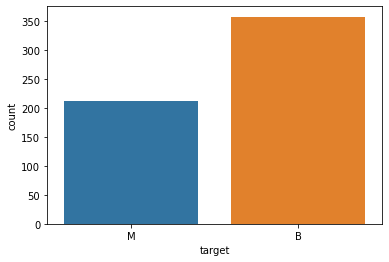

In [4]:
sns.countplot(data['target'])
print(data.target.value_counts())

### Label Encoding 

In [5]:
data['target'] = [1 if i.strip() == 'M' else 0 for i in data.target]
data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Info 

In [6]:
#information abaout data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
#data describe
data.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Exploratory Data Analysis (EDA)

### correlation betwenn features

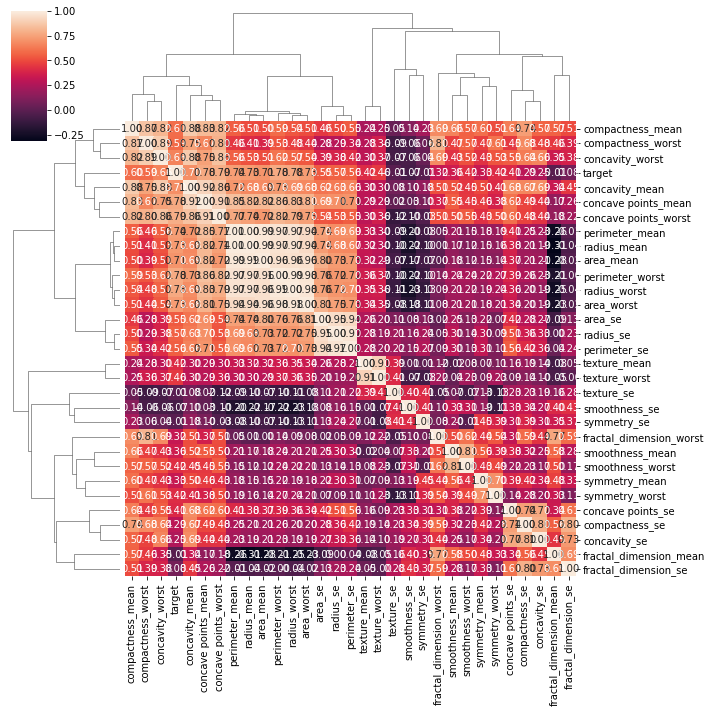

In [8]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix,annot=True, fmt = '.2f')
plt.show()

### Correlation with Threshhold (0.75)

Text(0.5, 1.0, 'Correlation Between Features Threshhold 0.75')

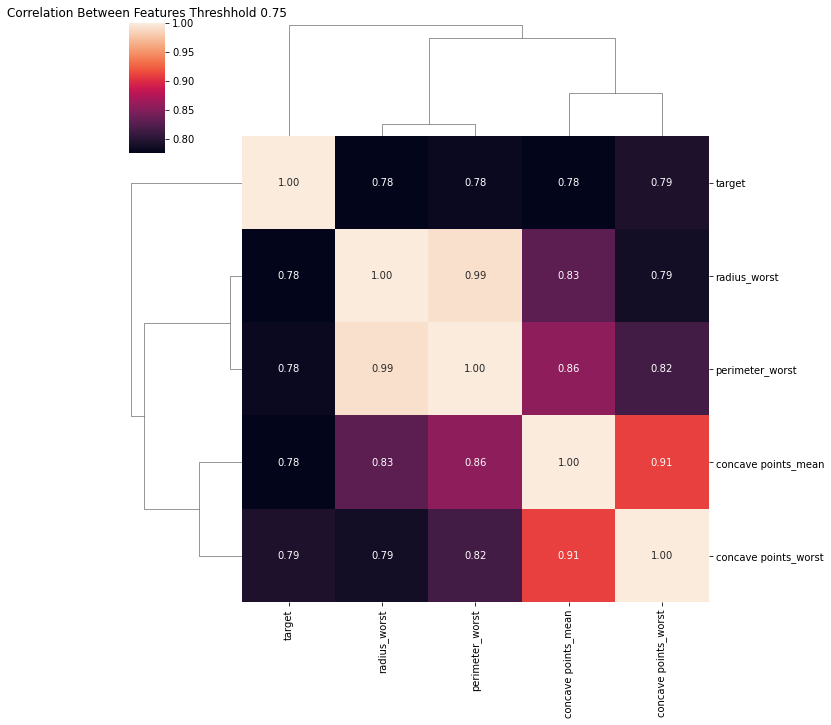

In [9]:
threshhold = .75
filters = np.abs(corr_matrix['target']) > threshhold
corr_features = corr_matrix.columns[filters].tolist()
sns.clustermap(data[corr_features].corr(),annot=True, fmt = '.2f')
plt.title('Correlation Between Features Threshhold 0.75')

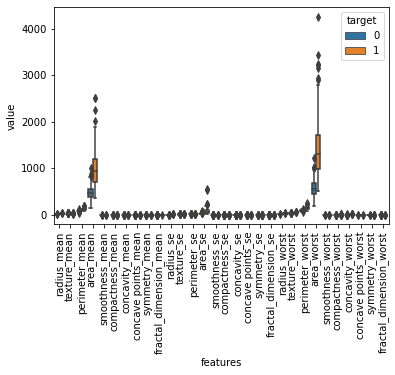

In [10]:
data_melted = pd.melt(
    data,id_vars='target',
    var_name='features',
    value_name='value')

plt.figure()
sns.boxplot(x='features',y='value',hue='target',data=data_melted)
plt.xticks(rotation=90)
plt.show()

## Outlier Detection


**Local Outlier Factor (LOF)** = Compare local density of one point to local density of K-NN

**For Example**

***K = 2***

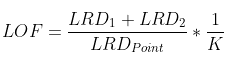

**What is LRD**

Local Reachablity Density 

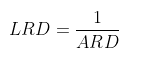

**What is ARD**

Avarege Reachablity Distance 

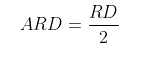

**What is RD**

Reachablity Distance 
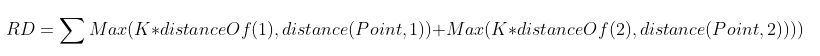

K'th nearest neighbor of first point and distance between point and '1' + K'th nearest neighbor of second point and distance between point and '2'. 

**The maximum function in the formula increases depending on the value of K. If the value of K is 5, we will have 5 maximum functions and we will need to calculate all 5 points according to this formula.**


We used the 'Local Outlier Factor' method from the 'Density Based Outlier Detection System' because there was a lot of skewness in our data.


In [11]:
y = data.target
x = data.drop(['target'], axis=1)

columns = x.columns.tolist()

In [12]:
lof = LocalOutlierFactor()

is_outlier = lof.fit_predict(x)
outliers = lof.negative_outlier_factor_

outlier_score = pd.DataFrame()
outlier_score['scores'] = outliers

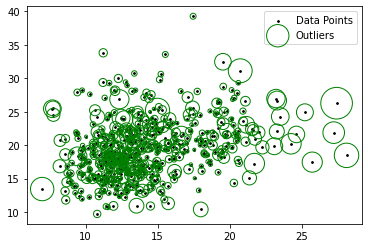

In [13]:
plt.figure()
plt.scatter(x.iloc[:,0],x.iloc[:,1], s = 3, color = 'k', label = 'Data Points')
radius = (outliers.max() - outliers) / (outliers.max()-outliers.min())
outlier_score['radius'] = radius
plt.scatter(x.iloc[:,0],x.iloc[:,1], s = 1000*radius, edgecolors = 'g', facecolor = 'none', label = 'Outliers')
plt.legend()
plt.show()

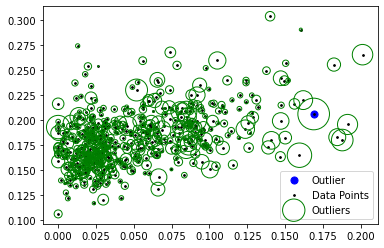

In [14]:
index_1 = 7
index_2 = 8
threshold = -2.5
filters = outlier_score['scores'] < threshold
outlier_index = outlier_score[filters].index.tolist()


plt.figure()
plt.scatter(x.iloc[outlier_index,index_1],x.iloc[outlier_index,index_2], s = 50, color = 'b', label = 'Outlier')
plt.scatter(x.iloc[:,index_1],x.iloc[:,index_2], s = 3, color = 'k', label = 'Data Points')

radius = (outliers.max() - outliers) / (outliers.max()-outliers.min())
outlier_score['radius'] = radius
plt.scatter(x.iloc[:,index_1],x.iloc[:,index_2], s = 1000*radius, edgecolors = 'g', facecolor = 'none', label = 'Outliers')
plt.legend()
plt.show()

In [15]:
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

## Train Test Split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = .3, random_state=42)

## Standardization

**Standardization Formula**
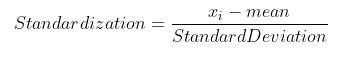

In [17]:
std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train,columns=columns)
X_train_df['target'] = Y_train

X_train_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,-0.126206,-0.106331,-0.139113,-0.243152,0.200584,0.082163,-0.426589,-0.287204,-0.345793,0.802295,...,0.026662,-0.235439,-0.316803,0.456859,0.060010,-0.359469,0.218125,-0.054096,0.396185,0
1,1.110155,0.350378,1.085508,0.972350,0.516224,0.541814,0.433900,1.051074,0.668203,-0.276397,...,-0.008771,0.960829,0.869669,0.705777,0.841678,0.340937,1.293014,0.281891,0.093907,1
2,-1.565931,-0.763715,-1.524658,-1.225782,1.326652,-0.408721,-0.589335,-0.780730,-0.582878,1.903286,...,-0.941303,-1.316628,-1.082299,1.762589,-0.075060,-0.092330,-0.146403,0.068515,1.048258,0
3,0.567081,-0.251647,0.550500,0.456043,0.061958,0.213772,0.101004,0.286230,0.190385,-0.026932,...,-0.031319,0.679317,0.656981,-0.027877,-0.160648,0.085079,0.112194,-0.144860,-0.103605,1
4,-0.487293,0.172769,-0.488764,-0.531209,-0.840888,-0.027839,-0.238905,-0.468792,-0.101412,-0.025539,...,-0.385649,-0.585008,-0.592932,-1.180763,-0.212804,-0.375364,-0.594274,-0.315243,-0.329168,0


In [18]:
X_train_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
count,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,...,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,397.000000
mean,1.789780e-17,-2.863648e-16,-7.243017e-17,-2.245615e-16,-2.125364e-17,-2.377052e-16,2.768566e-17,1.138188e-16,-1.639187e-15,6.843113e-16,...,-4.810034e-16,-4.438096e-16,-9.620069e-17,7.100394e-16,-1.185729e-16,7.187086e-17,-6.795572e-17,-6.739641e-17,3.383803e-17,0.375315
std,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,...,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,0.484815
min,-1.712388e+00,-2.175361e+00,-1.632924e+00,-1.303791e+00,-2.404872e+00,-1.638974e+00,-1.126020e+00,-1.291511e+00,-2.340956e+00,-1.731378e+00,...,-2.165353e+00,-1.558852e+00,-1.163524e+00,-2.217924e+00,-1.426295e+00,-1.351626e+00,-1.782104e+00,-2.098683e+00,-1.623010e+00,0.000000
25%,-7.039450e-01,-7.291157e-01,-7.065592e-01,-6.765379e-01,-7.086599e-01,-7.677983e-01,-7.505222e-01,-7.462174e-01,-6.923019e-01,-7.154003e-01,...,-7.528643e-01,-7.019438e-01,-6.578384e-01,-7.527979e-01,-6.715073e-01,-7.547935e-01,-7.847938e-01,-6.687460e-01,-6.938485e-01,0.000000
50%,-2.446426e-01,-1.109439e-01,-2.549616e-01,-2.989145e-01,-9.870612e-02,-2.500035e-01,-3.559314e-01,-3.888829e-01,-3.575803e-02,-1.774476e-01,...,-5.708877e-02,-2.809144e-01,-3.430225e-01,-4.097822e-02,-2.830139e-01,-2.487165e-01,-2.253839e-01,-1.273445e-01,-2.398587e-01,0.000000
75%,4.919745e-01,5.648931e-01,5.336490e-01,3.852569e-01,6.086412e-01,5.418139e-01,4.663710e-01,6.740944e-01,5.587789e-01,4.845408e-01,...,6.757303e-01,5.339215e-01,2.884427e-01,6.097035e-01,5.982844e-01,5.947450e-01,7.322025e-01,4.793437e-01,4.494271e-01,1.000000
max,4.033514e+00,4.645288e+00,4.063861e+00,5.327298e+00,4.767417e+00,4.097233e+00,4.417475e+00,4.049923e+00,4.490747e+00,4.845302e+00,...,3.877586e+00,3.782128e+00,4.325859e+00,3.771406e+00,4.615614e+00,3.461489e+00,2.511223e+00,5.979346e+00,5.130159e+00,1.000000


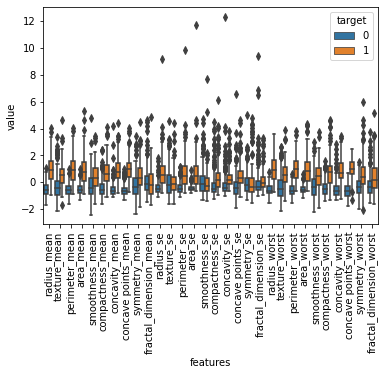

In [19]:
data_melted = pd.melt(
    X_train_df,id_vars='target',
    var_name='features',
    value_name='value')

plt.figure()
sns.boxplot(x='features',y='value',hue='target',data=data_melted)
plt.xticks(rotation=90)
plt.show()

## KNN Algorithm

In [34]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,Y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)

score = knn.score(X_test,Y_test)

print('cm: ',cm)
print('##########################3')
print('acc: ',acc)
print('##########################3')
print('score: ',score)

cm:  [[107   2]
 [  3  59]]
##########################3
acc:  0.9707602339181286
##########################3
score:  0.9707602339181286


## KNN Best Parameters

In [48]:
def find_best_param(x_train,x_test,y_train,y_test):
    
    k = list(range(2,30))
    weights = ['uniform','distance']
    
    param_grids = {
        'n_neighbors' : k,
        'weights' : weights
    }
    
    knn = KNeighborsClassifier()
    
    gridCV = GridSearchCV(knn, param_grids, cv=10, scoring='accuracy')
    
    gridCV.fit(x_train, y_train)
    
    print(f'Best training score : {gridCV.best_score_}\nBest parameters: {gridCV.best_params_}')
    
    knn = KNeighborsClassifier(**gridCV.best_params_)
    
    knn.fit(x_train,y_train)
    
    y_preds_test = knn.predict(x_test)
    y_preds_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test,y_preds_test)
    cm_train = confusion_matrix(y_train,y_preds_train)
    
    
    acc_test = accuracy_score(y_test,y_preds_test)
    acc_train = accuracy_score(y_train,y_preds_train)
    
    print(f'Test score: {acc_test}\nTrain score: {acc_train}')
    
    
    print('###########################################')
    
    print(f'Test score: {cm_test}\nTrain score: {cm_train}')
    
    return gridCV


gridCV = find_best_param(X_train,X_test,Y_train,Y_test)



Best training score : 0.9670512820512821
Best parameters: {'n_neighbors': 4, 'weights': 'uniform'}
Test score: 0.9590643274853801
Train score: 0.9773299748110831
###########################################
Test score: [[107   2]
 [  5  57]]
Train score: [[248   0]
 [  9 140]]


## PCA 

Text(0.5, 1.0, 'PCA: P1 vs P2')

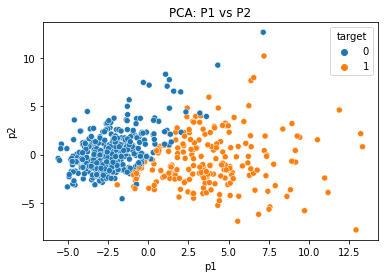

In [49]:
scaler = StandardScaler()

x_sclaed = scaler.fit_transform(x,y)

pca = PCA(n_components=2)

pca.fit(x_sclaed)
x_reduced = pca.transform(x_sclaed)

pca_data = pd.DataFrame(x_reduced, columns=['p1','p2'])

pca_data['target'] = y

sns.scatterplot(x='p1', y='p2', hue='target',data=pca_data)
plt.title('PCA: P1 vs P2')

In [56]:
X_trainP, X_testP, Y_trainP, Y_testP = train_test_split(x_reduced, y, test_size = .3, random_state=42)

grid_CV = find_best_param(X_trainP, X_testP, Y_trainP, Y_testP)

Best training score : 0.9419230769230769
Best parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Test score: 0.9239766081871345
Train score: 0.947103274559194
###########################################
Test score: [[103   6]
 [  7  55]]
Train score: [[241   7]
 [ 14 135]]


Text(0.5, 1.0, "2-Class classification (k = 9, weights = 'uniform')")

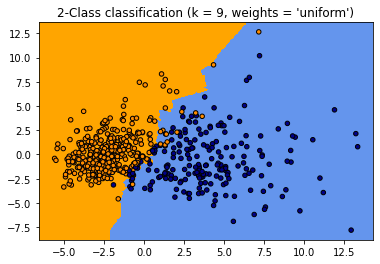

In [62]:
# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = x_reduced
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_CV.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_CV.best_estimator_.n_neighbors, grid_CV.best_estimator_.weights))

## NCA

Best training score : 0.9873076923076922
Best parameters: {'n_neighbors': 2, 'weights': 'distance'}
Test score: 0.9941520467836257
Train score: 1.0
###########################################
Test score: [[108   1]
 [  0  62]]
Train score: [[248   0]
 [  0 149]]


Text(0.5, 1.0, "2-Class classification (k = 2, weights = 'distance')")

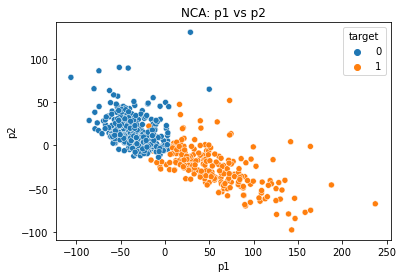

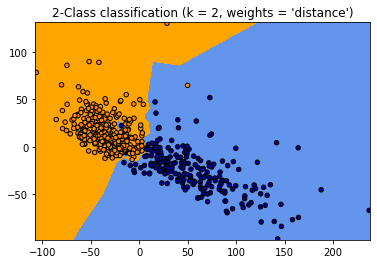

In [67]:
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_sclaed, y)
X_reduced_nca = nca.transform(x_sclaed)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])
nca_data["target"] = y
sns.scatterplot(x = "p1",  y = "p2", hue = "target", data = nca_data)
plt.title("NCA: p1 vs p2")

X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = .3, random_state = 42)

grid_nca = find_best_param(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)

# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .2 # step size in the mesh
X = X_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))

## Result Evaluation

[106]


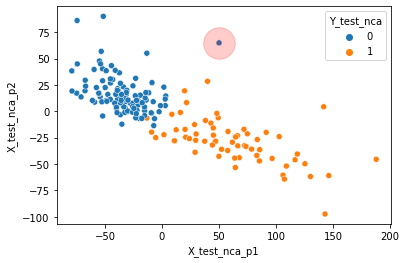

In [89]:
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(X_train_nca,Y_train_nca)
y_pred_nca = knn.predict(X_test_nca)
acc_test_nca = accuracy_score(y_pred_nca,Y_test_nca)
knn.score(X_test_nca,Y_test_nca)

test_data = pd.DataFrame()
test_data["X_test_nca_p1"] = X_test_nca[:,0]
test_data["X_test_nca_p2"] = X_test_nca[:,1]
test_data["y_pred_nca"] = y_pred_nca
test_data["Y_test_nca"] = Y_test_nca

plt.figure()
sns.scatterplot(x="X_test_nca_p1", y="X_test_nca_p2", hue="Y_test_nca",data=test_data)

diff = np.where(y_pred_nca!=Y_test_nca)[0]
print(diff)
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified",alpha = 0.2,color = "red",s = 1000)

